In [101]:
import os
from os.path import join

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# 1.데이터 가져오기

In [102]:
data_dir = os.getenv('HOME')+'/Project/hackathon1/data'

# 파일명
cats = join(data_dir, 'item_categories.csv')
items = join(data_dir, 'items.csv') 
shops = join(data_dir, 'shops.csv')
train = join(data_dir, 'sales_train.csv') 
test = join(data_dir, 'test.csv') 
sample_submission = join(data_dir, 'sample_submission.csv') 

# 데이터프레임
cats = pd.read_csv(cats, encoding='utf-8')
items = pd.read_csv(items, encoding='utf-8')
shops = pd.read_csv(shops, encoding='utf-8')
train = pd.read_csv(train, encoding='utf-8') # 훈련데이터셋
test = pd.read_csv(test, encoding='utf-8') # 테스트데이터셋
sample_submission = pd.read_csv(sample_submission, encoding='utf-8') #제출샘플 

# 2. 테이블별 데이터 정제

## 2-1. sales_train 데이터셋 정제 (train)

In [103]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


- item_cnt_day 와 item_price 의 이상치를 확인한 후 제거

<AxesSubplot:xlabel='item_price'>

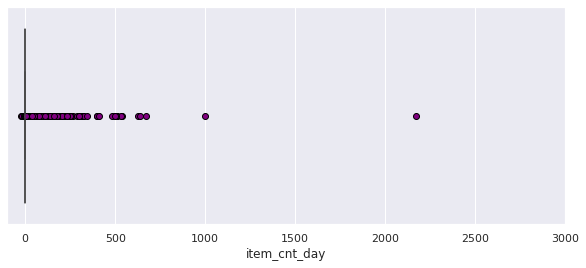

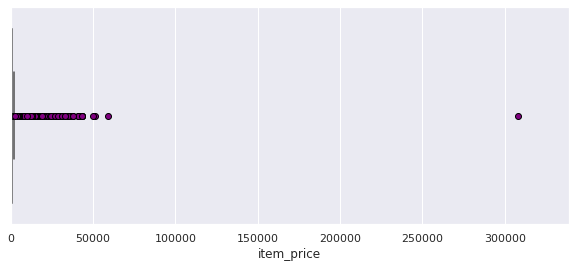

In [105]:
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')

# item 판매 갯수
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

# item 판매 가격
plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)

item_cnt_day(판매 된 제품 수) item_price(상품의 현재 가격)의 이상치에 대해서 더 탐구해보고자 하였습니다. 



In [106]:
train[train.item_cnt_day >= 1000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [107]:
train[train.item_price>= 300000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [108]:
train_datetime = train
train_datetime["date"]=pd.to_datetime(train["date"],format='%d.%m.%Y')

<AxesSubplot:title={'center':'Allover Sales by Date'}, xlabel='Days', ylabel='Sales'>

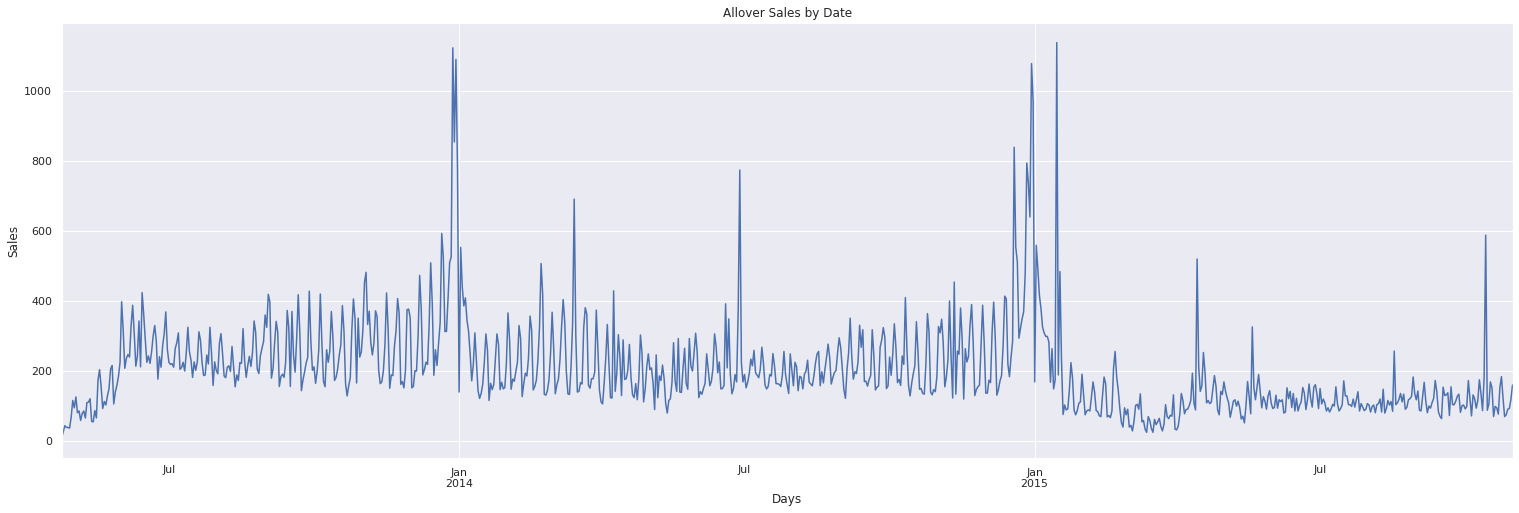

In [109]:
outlier_1 = train_datetime[train_datetime["item_id"] == 20949].groupby("date")['item_cnt_day'].sum()
outlier_1.plot(kind="line",
                    xlabel="Days",
                     ylabel="Sales",
                     title= "Allover Sales by Date",
                     figsize=(26,8))

<AxesSubplot:title={'center':'Allover Sales by Date'}, xlabel='Days', ylabel='Sales'>

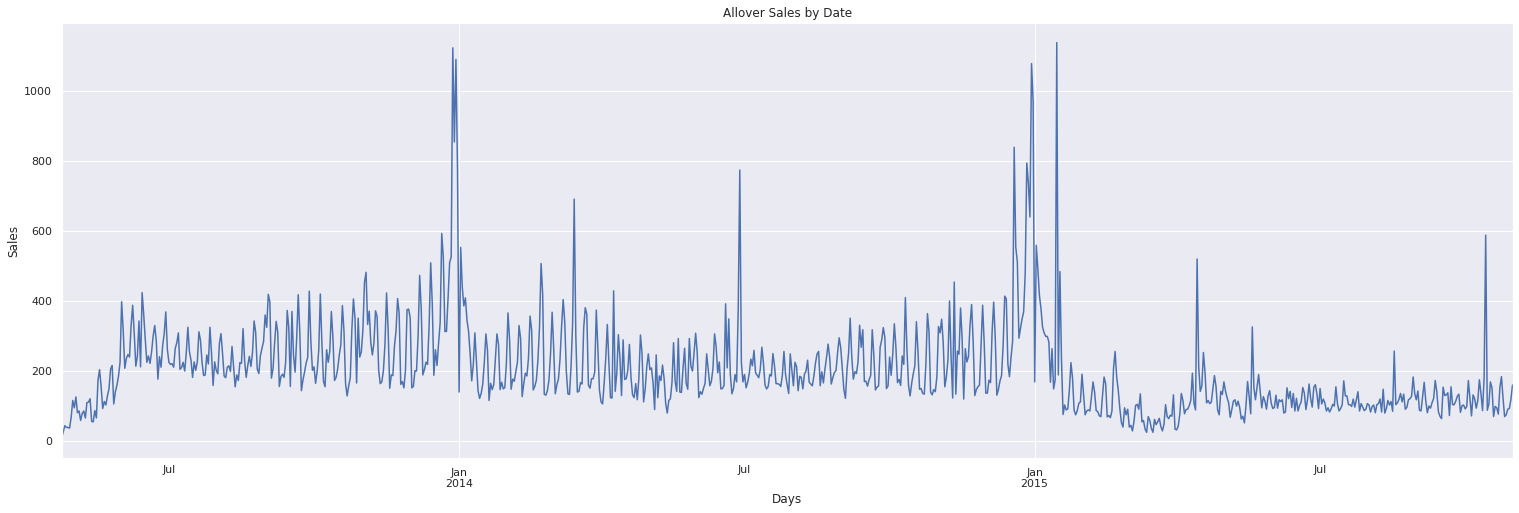

In [110]:
outlier_2 = train_datetime[train_datetime["item_id"] == 20949].groupby("date")['item_cnt_day'].sum()
outlier_1.plot(kind="line",
                    xlabel="Days",
                     ylabel="Sales",
                     title= "Allover Sales by Date",
                     figsize=(26,8))

In [111]:
test[test["item_id"] == 11373] 

,ID,shop_id,item_id
1596,1596,5,11373
6696,6696,4,11373
11796,11796,6,11373
16896,16896,3,11373
21996,21996,2,11373
27096,27096,7,11373
32196,32196,10,11373
37296,37296,12,11373
42396,42396,28,11373
47496,47496,31,11373


In [112]:
test[test["item_id"] == 20949] 

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949
25960,25960,7,20949
31060,31060,10,20949
36160,36160,12,20949
41260,41260,28,20949
46360,46360,31,20949


In [113]:
print(train[train["item_id"] == 6066] , "- \n---\n---\n---\n",test[test["item_id"] == 6066])

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
1163158 2013-12-13              11       12     6066    307980.0           1.0 - 
---
---
---
 Empty DataFrame
Columns: [ID, shop_id, item_id]
Index: []


train data에 단 한번 등장하는 data이고 test data에는 등장하지않는 데이터이기때문에 삭제하는 것으로 결정하였습니다.

In [114]:
# 이상치 삭제
train = train[(train.item_price < 300000 )& (train.item_cnt_day < 1000)]

In [115]:
train[(train.item_cnt_day >= 1000 )]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


shop_id 12는 러시아지역에서 상점 위치를 찾을 수가 없었다. 매장이 사라진거 같다. 튀는 값은 삭제 
300000루블이상 제거 한건 (category는 Program - For home and office) (item_name은 Radmin 3 - 522 persons.	)
1000

- shop_id 12는 현재 기준 매장이 폐업을 한것으로 예측되어지므로 판매예측값에 포함해서 결과를 가져가기에는 맞지 않은 값이라 판단하여 제거하였습니다.

In [116]:
train[train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [117]:
train[train.item_cnt_day < 1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [118]:
len(train[train.item_cnt_day < 1])/len(train) 

0.0025055810148079975

아주 적은 수치라서 의미없다. 

In [119]:
# item_price 가 음수이면 환불일 수 있을거 같다. 삭제
# item_cnt_day 가 음수이면 0 으로 세팅
train = train[train.item_price > 0].reset_index(drop = True)
train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0

In [120]:
# revenue(수익) 컬럼 추가
train["revenue"] = train["item_cnt_day"] * train["item_price"]

In [121]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,0.0,0.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


## 2-2. shops 데이터셋 정제

In [122]:
shops.head() # 정제 전

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [123]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- shop_id 재설정 ??

In [124]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

오타이거나(10, 11)..., 
하나의 상점이 폐업일 수도 있어서(0, 57) 또는 하나의 상점이 매출이 저조해서 통합한걸로 예상 (1, 58)
하지만 오타일 가능성이 크다.


- shop_name 을 공백을 기준으로 city와 category로 분리 

In [125]:
shops.loc[ shops.shop_name == 'Сергиев Посад ТЦ "7Я"',"shop_name" ] = 'СергиевПосад ТЦ "7Я"' # 도시 이름이 떨어져 있는거 붙여주기 
shops["city"] = shops.shop_name.str.split(" ").map( lambda x: x[0] )
shops["category"] = shops.shop_name.str.split(" ").map( lambda x: x[1] )
shops.loc[shops.city == "!Якутск", "city"] = "Якутск" # 도시 이름에 ! 들어간거 정제

In [126]:
shops.category.unique()

array(['Орджоникидзе,', 'ТЦ', 'ТРК', 'ТРЦ', '(Плехановская,', 'Торговля',
       'ул.', 'ЧС', '"Распродажа"', 'МТРЦ', 'Магазин', 'ТК', 'склад'],
      dtype=object)

- 상점이 5개 이상인 것만 카테고리로 분류하고 나머지는 other 로 정제

분포 그래프 필요할거 같다. 왜 5를 기준으로 했는지

In [127]:
category = []
for cat in shops.category.unique():
    if len(shops[shops.category == cat]) >= 5:
        category.append(cat)
shops.category = shops.category.apply( lambda x: x if (x in category) else "other" )

In [128]:
shops.category.unique() 

array(['other', 'ТЦ', 'ТРК', 'ТРЦ', 'ТК'], dtype=object)

In [129]:
shops.head() # 정제 후

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,other
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


## 2-3. item_categories 데이터셋 정제 (cats)

In [130]:
cats.head() # 정제 전

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [131]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


- item_category_name 공백을 기준으로 type 과 category 로 분리

In [132]:
cats["type_code"] = cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str) 
cats.loc[ (cats.type_code == "Игровые")| (cats.type_code == "Аксессуары"), "category" ] = "Игры" 
#"Игровые"(영문:'Gaming') 과 "Аксессуары"(영문:'Accessories')는 "Игры" (영문:'Games')으로 통합

왜 게이밍이랑 액세사리를 합쳤는지 적기. 액세사리 목록을 보니 다 게임이랑 관련이 되어있다던가
PS2를 보니 게임과 악세사리를 합치는게 맞는거 같다.

In [133]:
cats.type_code.unique()

array(['PC', 'Аксессуары', 'Билеты', 'Доставка', 'Игровые', 'Игры',
       'Карты', 'Кино', 'Книги', 'Музыка', 'Подарки', 'Программы',
       'Служебные', 'Чистые', 'Элементы'], dtype=object)

In [134]:
cats.category.unique()

array([nan, 'Игры'], dtype=object)

- type_code이 5개 이상인 것만 카테고리로 분류하고 나머지는 other 로 정제

In [135]:
category = []
for cat in cats.type_code.unique():
    if len(cats[cats.type_code == cat]) >= 5: 
        category.append( cat )
cats.type_code = cats.type_code.apply(lambda x: x if (x in category) else "etc")

In [136]:
cats["split"] = cats.item_category_name.apply(lambda x: x.split("-"))
cats["subtype"] = cats.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats = cats[["item_category_id", "item_category_name", "subtype", "type_code"]]

In [137]:
cats # 정제 후

,item_category_id,item_category_name,subtype,type_code
0,0,PC - Гарнитуры/Наушники,Гарнитуры/Наушники,etc
1,1,Аксессуары - PS2,PS2,Аксессуары
2,2,Аксессуары - PS3,PS3,Аксессуары
3,3,Аксессуары - PS4,PS4,Аксессуары
4,4,Аксессуары - PSP,PSP,Аксессуары
...,...,...,...,...
79,79,Служебные,Служебные,etc
80,80,Служебные - Билеты,Билеты,etc
81,81,Чистые носители (шпиль),Чистые носители (шпиль),etc
82,82,Чистые носители (штучные),Чистые носители (штучные),etc


조인해서 각 범주별로 어떻게 분포되어있는지 분포 그려보기 

## 2-4. items 데이터셋 정제

In [138]:
items.head() # 정제 전

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [139]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


- name 정제

In [140]:
import re
def name_correction(x):
    x = x.lower() # all letters lower case
    x = x.partition('[')[0] # partition by square brackets
    x = x.partition('(')[0] # partition by curly brackets
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x) # remove special characters
    x = x.replace('  ', ' ') # replace double spaces with single spaces
    x = x.strip() # remove leading and trailing white space
    return x

In [141]:
items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
items["name1"], items["name3"] = items.item_name.str.split("(", 1).str

/home/ssac6/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/home/ssac6/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [142]:
#items.head()

In [143]:
# replace special characters and turn to lower case
items["name2"] = items.name2.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()
items["name3"] = items.name3.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()

In [144]:
#items.head(10)

In [145]:
# fill nulls with '0'
items = items.fillna('0')

In [146]:
#items.head()

In [147]:
# item_name 컬럼을 위 함수로 정제시킴
items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))

In [148]:
#items.head()

In [149]:
# return all characters except the last if name 2 is not "0" - the closing bracket
items.name2 = items.name2.apply( lambda x: x[:-1] if x !="0" else "0")

In [150]:
#items.head(15)

In [151]:
# items_name2를 분리해 type컬럼을 만들고, 비슷한 의미의 type은 하나로 정제 시킴
items["type"] = items.name2.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0] )
items.loc[(items.type == "x360") | (items.type == "xbox360") | (items.type == "xbox 360") ,"type"] = "xbox 360"
items.loc[ items.type == "", "type"] = "mac"
items.type = items.type.apply( lambda x: x.replace(" ", "") )
items.loc[ (items.type == 'pc' )| (items.type == 'pс') | (items.type == "pc"), "type" ] = "pc"
items.loc[ items.type == 'рs3' , "type"] = "ps3"

게임기 xbox360에 오타나 띄어쓰기 잘못된것을 통합함.
공백은 왜 mac으로 고쳤는지 파악할 필요가 있음.
나머지는 확인해야할듯

In [152]:
items.type.unique()

array(['0', 'pc', 'ps3', 'xbox360', 'цифровая', 'mac', 'psp', 'ps4',
       'xboxone', 'ps', 'русская', 'рс', 'android', 'англ', 'ps2',
       'только', 'цифро', '6jv', 'j72', 'hm3', 's3v', '6dv', '6l6', '5f4',
       's4v', 'kg4', '5c5', '5c7', 'kf7', 'kf6'], dtype=object)

In [153]:
#items.head()

In [154]:
group_sum = items.groupby(["type"]).agg({"item_id": "count"})
group_sum = group_sum.reset_index()
drop_cols = []
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)
items.name2 = items.name2.apply( lambda x: "other" if (x in drop_cols) else x )
items = items.drop(["type"], axis = 1)

왜 40 이하는  other 처리했는지 정리해야함

In [155]:
items.head() # 정제 후 

,item_name,item_id,item_category_id,name1,name2,name3
0,во власти наваждения,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,пласт d
1,abbyy finereader 12 professional edition full,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,0
2,в лучах славы,2,40,***В ЛУЧАХ СЛАВЫ,0,unv d
3,голубая волна,3,40,***ГОЛУБАЯ ВОЛНА,0,univ d
4,коробка,4,40,***КОРОБКА,0,стекло d


이렇게 전처리한걸로 분포를 eda를통해 확인해볼것

# 3. LabelEncoding

In [156]:
from sklearn.preprocessing import LabelEncoder ## 범주형 데이터를 0부터 시작하는 정수형식으로 바꿔준다.

In [157]:
# shops LabelEncoding
shops["shop_category"] = LabelEncoder().fit_transform( shops.category )
shops["shop_city"] = LabelEncoder().fit_transform( shops.city )
shops = shops[["shop_id", "shop_category", "shop_city"]]
shops.head()

,shop_id,shop_category,shop_city
0,0,0,29
1,1,4,29
2,2,4,0
3,3,2,1
4,4,4,2


In [158]:
# cats LabelEncoding 
cats.type_code = LabelEncoder().fit_transform(cats.type_code)
cats["subtype_code"] = LabelEncoder().fit_transform( cats.subtype )
cats = cats[["item_category_id", "subtype_code", "type_code"]]
cats.head()

,item_category_id,subtype_code,type_code
0,0,29,0
1,1,9,1
2,2,10,1
3,3,11,1
4,4,13,1


In [159]:
# items labelEncoding
items.name2 = LabelEncoder().fit_transform(items.name2)
items.name3 = LabelEncoder().fit_transform(items.name3)

items.drop(["item_name", "name1"],axis = 1, inplace= True)
items.head()

,item_id,item_category_id,name2,name3
0,0,40,4,1331
1,1,76,64,42
2,2,40,4,1011
3,3,40,4,1010
4,4,40,4,1572


# 4. matrix 만들기

Create a matrix df with every combination of month, shop and item in order of increasing month.    
month가 증가하는 순으로 shop과 item, month가 매번 조합하여 matrix를 생성한다. 

In [160]:
from itertools import product
import time
ts = time.time()
matrix = []
cols  = ["date_block_num", "shop_id", "item_id"]
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )
    # month, shop, item 조합하여 matrix 구성

matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values( cols, inplace = True )
time.time()- ts

7.861630439758301

In [161]:
matrix.head()

,date_block_num,shop_id,item_id
114910,0,2,19
117150,0,2,27
120623,0,2,28
118316,0,2,29
114602,0,2,32


Item_cnt_day is summed into an item_cnt_month.  
item_cnt_day는 item_cnt_month에 따라 sum 된다.

## item_cnt_month 추가

In [162]:
ts = time.time()
group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} ) # groupby 기준에 따라 item_cnt_day를 sum
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = cols, how = "left" ) 
# matrix와 위에서 구한 group 을 조인하여 item_cnt_month를 생성. 조인 기준은 cols  = ["date_block_num", "shop_id", "item_id"]
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)
time.time() - ts

2.8619558811187744

In [163]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,19,0.0
1,0,2,27,1.0
2,0,2,28,0.0
3,0,2,29,0.0
4,0,2,32,0.0


In [164]:
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)

matrix와 test 를 왜 concat 할까?
keys 는 cols =  ["date_block_num", "shop_id", "item_id"]

In [165]:
ts = time.time()

matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
matrix.fillna( 0, inplace = True )
time.time() - ts

0.047345876693725586

In [166]:
# matrix 데이터셋과 shops, items, cats 조인
ts = time.time()
matrix = pd.merge( matrix, shops, on = ["shop_id"], how = "left" )
matrix = pd.merge(matrix, items, on = ["item_id"], how = "left")
matrix = pd.merge( matrix, cats, on = ["item_category_id"], how = "left" )
matrix["shop_city"] = matrix["shop_city"].astype(np.int8)
matrix["shop_category"] = matrix["shop_category"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["subtype_code"] = matrix["subtype_code"].astype(np.int8)
matrix["name2"] = matrix["name2"].astype(np.int8)
matrix["name3"] = matrix["name3"].astype(np.int16)
matrix["type_code"] = matrix["type_code"].astype(np.int8)
time.time() - ts

2.635215997695923

In [167]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,type_code
0,0,2,19,0.0,4,0,40,4,42,4,5
1,0,2,27,1.0,4,0,19,76,42,10,3
2,0,2,28,0.0,4,0,30,107,42,55,3
3,0,2,29,0.0,4,0,23,123,42,16,3
4,0,2,32,0.0,4,0,40,4,42,4,5


# 6. Feature Engineering

lag feature 와 그 외 필요 feature 추가

## 6-0. lag feature 추가 함수

In [168]:
# Define a lag feature function
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]] # df는 matrix, 컬럼을 재설정하여 tmp 생성
        for i in lags:
            shifted = tmp.copy() # shifted로 copy
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)] # shifted 에 lags 순으로 cols 를 다시 구성
            shifted.date_block_num = shifted.date_block_num + i # lag 만큼 date_block_num을 더함.
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left') # lag가 구성된 shifted와 df 조인
    return df

## 6-1. item_cnt_month_1, _2, _3 

In [169]:
ts = time.time()
matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )
time.time() - ts

item_cnt_month


12.573597192764282

In [170]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,type_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
0,0,2,19,0.0,4,0,40,4,42,4,5,NaN,NaN,NaN
1,0,2,27,1.0,4,0,19,76,42,10,3,NaN,NaN,NaN
2,0,2,28,0.0,4,0,30,107,42,55,3,NaN,NaN,NaN
3,0,2,29,0.0,4,0,23,123,42,16,3,NaN,NaN,NaN
4,0,2,32,0.0,4,0,40,4,42,4,5,NaN,NaN,NaN


## 6-2. date_avg_item_cnt _1 (월별 평균)
(Add the previous month's average item_cnt. 왜 이전이지? 위에 lag_feature() 함수에서는 date_block_num + lag 를 하는데... )

In [171]:
ts = time.time()
group = matrix.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num"], how = "left")
matrix.date_avg_item_cnt = matrix["date_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1], ["date_avg_item_cnt"] )
matrix.drop( ["date_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

date_avg_item_cnt


6.2100160121917725

In [173]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,type_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_avg_item_cnt_lag_1
11127994,34,45,3280,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.289795
11127995,34,45,4393,0.0,4,20,22,70,42,14,3,0.0,0.0,0.0,0.289795
11127996,34,45,4352,0.0,4,20,22,70,42,14,3,0.0,0.0,0.0,0.289795
11127997,34,45,18049,0.0,4,20,70,4,42,57,8,0.0,0.0,0.0,0.289795
11127998,34,45,18027,0.0,4,20,70,4,42,57,8,0.0,0.0,0.0,0.289795
11127999,34,45,18454,0.0,4,20,55,4,42,2,7,1.0,0.0,0.0,0.289795
11128000,34,45,16188,0.0,4,20,64,4,42,42,8,0.0,0.0,NaN,0.289795
11128001,34,45,15757,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.289795
11128002,34,45,19648,0.0,4,20,40,4,1367,4,5,0.0,0.0,0.0,0.289795
11128003,34,45,969,0.0,4,20,37,4,562,1,5,0.0,0.0,0.0,0.289795


## 6-3. date_item_avg_item_cnt_1, _2, _3 (월별, item별 평균)
(Add lag values of item_cnt_month for month / item_id.) 월별, item별 평균

In [174]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix.date_item_avg_item_cnt = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3], ['date_item_avg_item_cnt'])
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_avg_item_cnt


15.262730598449707

In [175]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,type_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3
11127994,34,45,3280,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.289795,0.022720,0.069763,0.071411
11127995,34,45,4393,0.0,4,20,22,70,42,14,3,0.0,0.0,0.0,0.289795,0.022720,0.023254,0.071411
11127996,34,45,4352,0.0,4,20,22,70,42,14,3,0.0,0.0,0.0,0.289795,0.045441,0.023254,0.238037
11127997,34,45,18049,0.0,4,20,70,4,42,57,8,0.0,0.0,0.0,0.289795,0.090881,0.232544,0.285645
11127998,34,45,18027,0.0,4,20,70,4,42,57,8,0.0,0.0,0.0,0.289795,0.068176,0.093018,0.214233
11127999,34,45,18454,0.0,4,20,55,4,42,2,7,1.0,0.0,0.0,0.289795,0.045441,0.023254,0.071411
11128000,34,45,16188,0.0,4,20,64,4,42,42,8,0.0,0.0,NaN,0.289795,0.022720,0.069763,NaN
11128001,34,45,15757,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.289795,0.113647,0.069763,0.095215
11128002,34,45,19648,0.0,4,20,40,4,1367,4,5,0.0,0.0,0.0,0.289795,0.045441,0.069763,0.166626
11128003,34,45,969,0.0,4,20,37,4,562,1,5,0.0,0.0,0.0,0.289795,0.068176,0.116272,0.023804


## 6-4. date_shop_avg_item_cnt_1, _2, _3 (월별, 상점별 평균)
(Add lag values for item_cnt_month for every month / shop combination.) 월별, 상점별 평균

In [176]:
ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_avg_item_cnt"] )
matrix.drop( ["date_shop_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

/home/ssac6/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


date_shop_avg_item_cnt


15.61525559425354

In [177]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.0,0.0,0.0,0.289795,0.022720,0.069763,0.071411,0.129639,0.129395,0.13916
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.0,0.0,0.0,0.289795,0.022720,0.023254,0.071411,0.129639,0.129395,0.13916
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.0,0.0,0.0,0.289795,0.045441,0.023254,0.238037,0.129639,0.129395,0.13916
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.0,0.0,0.0,0.289795,0.090881,0.232544,0.285645,0.129639,0.129395,0.13916
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.0,0.0,0.0,0.289795,0.068176,0.093018,0.214233,0.129639,0.129395,0.13916
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,1.0,0.0,0.0,0.289795,0.045441,0.023254,0.071411,0.129639,0.129395,0.13916
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,0.0,0.0,NaN,0.289795,0.022720,0.069763,NaN,0.129639,0.129395,NaN
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.0,0.0,0.0,0.289795,0.113647,0.069763,0.095215,0.129639,0.129395,0.13916
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.0,0.0,0.0,0.289795,0.045441,0.069763,0.166626,0.129639,0.129395,0.13916
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.0,0.0,0.0,0.289795,0.068176,0.116272,0.023804,0.129639,0.129395,0.13916


## 6-5. date_shop_item_avg_item_cnt_1, _2, _3 (월별, 상점별, item별 평균)
(Add lag values for item_cnt_month for month/shop/item.) 월별, 상점별, item별 평균

In [178]:
ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id","item_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_item_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id","item_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_item_avg_item_cnt"] )
matrix.drop( ["date_shop_item_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

/home/ssac6/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


date_shop_item_avg_item_cnt


23.407667875289917

In [179]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.289795,0.022720,0.069763,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.289795,0.022720,0.023254,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.289795,0.045441,0.023254,0.238037,0.129639,0.129395,0.13916,0.0,0.0,0.0
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.289795,0.090881,0.232544,0.285645,0.129639,0.129395,0.13916,0.0,0.0,0.0
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.289795,0.068176,0.093018,0.214233,0.129639,0.129395,0.13916,0.0,0.0,0.0
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.289795,0.045441,0.023254,0.071411,0.129639,0.129395,0.13916,1.0,0.0,0.0
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,0.289795,0.022720,0.069763,NaN,0.129639,0.129395,NaN,0.0,0.0,NaN
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.289795,0.113647,0.069763,0.095215,0.129639,0.129395,0.13916,0.0,0.0,0.0
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.289795,0.045441,0.069763,0.166626,0.129639,0.129395,0.13916,0.0,0.0,0.0
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.289795,0.068176,0.116272,0.023804,0.129639,0.129395,0.13916,0.0,0.0,0.0


## 6-6. date_shop_subtype_avg_item_cnt_1 (월별, 상점별, item subtype별 평균)
(Add lag values for item_cnt_month for month/shop/item subtype.) 월별, 상점별, item subtype별 평균

In [180]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix.date_shop_subtype_avg_item_cnt = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_subtype_avg_item_cnt'])
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_shop_subtype_avg_item_cnt


8.315114259719849

In [181]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.022720,0.069763,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.022720,0.023254,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.045441,0.023254,0.238037,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.090881,0.232544,0.285645,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.068176,0.093018,0.214233,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.045441,0.023254,0.071411,0.129639,0.129395,0.13916,1.0,0.0,0.0,0.126831
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,0.022720,0.069763,NaN,0.129639,0.129395,NaN,0.0,0.0,NaN,0.094482
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.113647,0.069763,0.095215,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.045441,0.069763,0.166626,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.083740
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.068176,0.116272,0.023804,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126343


## 6-7. date_city_avg_item_cnt_1 (월별, 도시별 평균)
(Add lag values for item_cnt_month for month/city.) 월별, 도시별 평균

In [182]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_city_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', "shop_city"], how='left')
matrix.date_city_avg_item_cnt = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_city_avg_item_cnt'])
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_city_avg_item_cnt


8.460672616958618

In [183]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.069763,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.023254,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.023254,0.238037,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.232544,0.285645,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.093018,0.214233,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.023254,0.071411,0.129639,0.129395,0.13916,1.0,0.0,0.0,0.126831,0.136841
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,0.069763,NaN,0.129639,0.129395,NaN,0.0,0.0,NaN,0.094482,0.136841
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.069763,0.095215,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.069763,0.166626,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.083740,0.136841
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.116272,0.023804,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126343,0.136841


## 6-8. date_item_city_avg_item_cnt_1 (월별, 도시별, item별 평균)
(Add lag values for item_cnt_month for month/city/item.) 월별, 도시별, item별 평균

In [184]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'shop_city'], how='left')
matrix.date_item_city_avg_item_cnt = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_item_city_avg_item_cnt'])
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_city_avg_item_cnt


13.939298868179321

In [185]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_item_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841,0.0
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.071411,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841,0.0
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.238037,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841,0.0
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.285645,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841,0.0
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.214233,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841,0.0
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.071411,0.129639,0.129395,0.13916,1.0,0.0,0.0,0.126831,0.136841,0.5
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,NaN,0.129639,0.129395,NaN,0.0,0.0,NaN,0.094482,0.136841,0.0
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.095215,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841,0.0
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.166626,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.083740,0.136841,0.0
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.023804,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126343,0.136841,0.5


## 6-9.  item_avg_item_price (item별 가격 평균),  delta_price_lag (??????)
Add average item price on to matix df.   
Add lag values of item price per month.  (????? 생각해 봐야함.)   
Add delta price values - how current month average pirce relates to global average.  (????? 생각해 봐야함.)  

In [186]:
ts = time.time()
# item 별 가격 평균
group = train.groupby( ["item_id"] ).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge( group, on = ["item_id"], how = "left" )
matrix["item_avg_item_price"] = matrix.item_avg_item_price.astype(np.float16)

# 월별 item별 가격 평균 (어떤 의미일까?)
group = train.groupby( ["date_block_num","item_id"] ).agg( {"item_price": ["mean"]} )
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge(group, on = ["date_block_num","item_id"], how = "left")
matrix["date_item_avg_item_price"] = matrix.date_item_avg_item_price.astype(np.float16)
lags = [1, 2, 3]
matrix = lag_feature( matrix, lags, ["date_item_avg_item_price"] )
for i in lags:
    matrix["delta_price_lag_" + str(i) ] = (matrix["date_item_avg_item_price_lag_" + str(i)]- matrix["item_avg_item_price"] )/ matrix["item_avg_item_price"]

def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

matrix["delta_price_lag"] = matrix.apply(select_trends, axis = 1)
matrix["delta_price_lag"] = matrix.delta_price_lag.astype( np.float16 )
matrix["delta_price_lag"].fillna( 0 ,inplace = True)

features_to_drop = ["item_avg_item_price", "date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_" + str(i) )
    features_to_drop.append("delta_price_lag_" + str(i) )
matrix.drop(features_to_drop, axis = 1, inplace = True)
time.time() - ts

date_item_avg_item_price


135.49930262565613

In [187]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,delta_price_lag
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841,0.0,0.171143
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841,0.0,-0.597168
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841,0.0,-0.181519
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841,0.0,-0.079773
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841,0.0,-0.105957
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.129639,0.129395,0.13916,1.0,0.0,0.0,0.126831,0.136841,0.5,-0.475098
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,0.129639,0.129395,NaN,0.0,0.0,NaN,0.094482,0.136841,0.0,0.081116
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841,0.0,0.155884
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.083740,0.136841,0.0,-0.091736
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.129639,0.129395,0.13916,0.0,0.0,0.0,0.126343,0.136841,0.5,-0.605957


## 6-10.  delta_revenue_lag_1 (????)
Add total shop revenue per month to matix df.  
Add lag values of revenue per month.  
Add delta revenue values - how current month revenue relates to global average.  

In [188]:
ts = time.time()
group = train.groupby( ["date_block_num","shop_id"] ).agg({"revenue": ["sum"] })
group.columns = ["date_shop_revenue"]
group.reset_index(inplace = True)

matrix = matrix.merge( group , on = ["date_block_num", "shop_id"], how = "left" )
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(["shop_id"]).agg({ "date_block_num":["mean"] })
group.columns = ["shop_avg_revenue"]
group.reset_index(inplace = True )

matrix = matrix.merge( group, on = ["shop_id"], how = "left" )
matrix["shop_avg_revenue"] = matrix.shop_avg_revenue.astype(np.float32)
matrix["delta_revenue"] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix["delta_revenue"] = matrix["delta_revenue"]. astype(np.float32)

matrix = lag_feature(matrix, [1], ["delta_revenue"])
matrix["delta_revenue_lag_1"] = matrix["delta_revenue_lag_1"].astype(np.float32)
matrix.drop( ["date_shop_revenue", "shop_avg_revenue", "delta_revenue"] ,axis = 1, inplace = True)
time.time() - ts

delta_revenue


9.691880464553833

In [189]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841,0.0,0.171143,51790.574219
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841,0.0,-0.597168,51790.574219
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.129395,0.13916,0.0,0.0,0.0,0.135132,0.136841,0.0,-0.181519,51790.574219
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841,0.0,-0.079773,51790.574219
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.129395,0.13916,0.0,0.0,0.0,0.139404,0.136841,0.0,-0.105957,51790.574219
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.129395,0.13916,1.0,0.0,0.0,0.126831,0.136841,0.5,-0.475098,51790.574219
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,0.129395,NaN,0.0,0.0,NaN,0.094482,0.136841,0.0,0.081116,51790.574219
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.129395,0.13916,0.0,0.0,0.0,0.126831,0.136841,0.0,0.155884,51790.574219
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.129395,0.13916,0.0,0.0,0.0,0.083740,0.136841,0.0,-0.091736,51790.574219
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.129395,0.13916,0.0,0.0,0.0,0.126343,0.136841,0.5,-0.605957,51790.574219


## 6-11. 그외 feature 추가 

### month, days 추가
Add month and number of days in each month to matrix df.

In [190]:
matrix["month"] = matrix["date_block_num"] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix["days"] = matrix["month"].map(days).astype(np.int8)

### item_shop_first_sale, item_first_sale 추가

In [191]:
ts = time.time()
matrix["item_shop_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id","shop_id"])["date_block_num"].transform('min')
matrix["item_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id"])["date_block_num"].transform('min')
time.time() - ts

1.1339504718780518

### 처음 3달은 lag 값이 없어서 삭제 
Delete first three months from matrix. They don't have lag values.

In [192]:
ts = time.time()
matrix = matrix[matrix["date_block_num"] > 3]
time.time() - ts

0.6833693981170654

In [193]:
matrix.tail(10)

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_first_sale,item_first_sale
11127994,34,45,3280,0.0,4,20,55,4,42,2,...,0.0,0.126831,0.136841,0.0,0.171143,51790.574219,10,30,34,34
11127995,34,45,4393,0.0,4,20,22,70,42,14,...,0.0,0.135132,0.136841,0.0,-0.597168,51790.574219,10,30,19,19
11127996,34,45,4352,0.0,4,20,22,70,42,14,...,0.0,0.135132,0.136841,0.0,-0.181519,51790.574219,10,30,24,24
11127997,34,45,18049,0.0,4,20,70,4,42,57,...,0.0,0.139404,0.136841,0.0,-0.079773,51790.574219,10,30,8,8
11127998,34,45,18027,0.0,4,20,70,4,42,57,...,0.0,0.139404,0.136841,0.0,-0.105957,51790.574219,10,30,5,5
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.0,0.126831,0.136841,0.5,-0.475098,51790.574219,10,30,11,11
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,NaN,0.094482,0.136841,0.0,0.081116,51790.574219,10,30,2,2
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.0,0.126831,0.136841,0.0,0.155884,51790.574219,10,30,34,34
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.0,0.083740,0.136841,0.0,-0.091736,51790.574219,10,30,11,11
11128003,34,45,969,0.0,4,20,37,4,562,1,...,0.0,0.126343,0.136841,0.5,-0.605957,51790.574219,10,30,17,17


In [194]:
matrix.head().T

,1497465,1497466,1497467,1497468,1497469
date_block_num,4.000000,4.000000,4.0,4.000000,4.000000
shop_id,2.000000,2.000000,2.0,2.000000,2.000000
item_id,27.000000,28.000000,29.0,30.000000,31.000000
item_cnt_month,0.000000,0.000000,0.0,0.000000,0.000000
shop_category,4.000000,4.000000,4.0,4.000000,4.000000
shop_city,0.000000,0.000000,0.0,0.000000,0.000000
item_category_id,19.000000,30.000000,23.0,40.000000,37.000000
name2,76.000000,107.000000,123.0,4.000000,4.000000
name3,42.000000,42.000000,42.0,42.000000,562.000000
subtype_code,10.000000,55.000000,16.0,4.000000,1.000000


# 7. 일단 모델 돌려보자

In [90]:
import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [91]:
data = matrix.copy()
del matrix
gc.collect()

166

In [92]:
data

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,...,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_first_sale,item_first_sale
1497465,4,2,27,0.0,4,0,19,76,42,10,...,0.0,0.449463,0.071838,0.0,0.367676,37326.816406,4,31,4,4
1497466,4,2,28,0.0,4,0,30,107,42,55,...,0.0,0.387207,0.071838,0.0,0.256348,37326.816406,4,31,4,4
1497467,4,2,29,0.0,4,0,23,123,42,16,...,NaN,NaN,NaN,NaN,0.000000,NaN,4,31,4,4
1497468,4,2,30,0.0,4,0,40,4,42,4,...,0.0,0.018585,0.071838,0.0,0.212402,37326.816406,4,31,3,3
1497469,4,2,31,0.0,4,0,37,4,562,1,...,4.0,0.035919,0.071838,1.0,0.191040,37326.816406,4,31,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,4,20,55,4,42,2,...,0.0,0.126831,0.136841,0.5,-0.475098,51790.574219,10,30,11,11
11128000,34,45,16188,0.0,4,20,64,4,42,42,...,NaN,0.094482,0.136841,0.0,0.081116,51790.574219,10,30,2,2
11128001,34,45,15757,0.0,4,20,55,4,42,2,...,0.0,0.126831,0.136841,0.0,0.155884,51790.574219,10,30,34,34
11128002,34,45,19648,0.0,4,20,40,4,1367,4,...,0.0,0.083740,0.136841,0.0,-0.091736,51790.574219,10,30,11,11


In [93]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [95]:
y_train = y_train.clip(0, 20)
y_valid = y_valid.clip(0, 20)

In [96]:
del data
gc.collect();

In [98]:
ts = time.time()

model = XGBRegressor(
    max_depth=10, # 한 트리의 최대 깊이
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1, # learning rate. 트리에 가지가 많을수록 과적합 발생.
#     tree_method='gpu_hist',
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

time.time() - ts

[0]	validation_0-rmse:1.17822	validation_1-rmse:1.12031
[1]	validation_0-rmse:1.12716	validation_1-rmse:1.08058
[2]	validation_0-rmse:1.08225	validation_1-rmse:1.05086
[3]	validation_0-rmse:1.04726	validation_1-rmse:1.02282
[4]	validation_0-rmse:1.01598	validation_1-rmse:1.00085
[5]	validation_0-rmse:0.98713	validation_1-rmse:0.98172
[6]	validation_0-rmse:0.96308	validation_1-rmse:0.96864
[7]	validation_0-rmse:0.94421	validation_1-rmse:0.95858
[8]	validation_0-rmse:0.92528	validation_1-rmse:0.94715
[9]	validation_0-rmse:0.91062	validation_1-rmse:0.93922
[10]	validation_0-rmse:0.89809	validation_1-rmse:0.93255
[11]	validation_0-rmse:0.88762	validation_1-rmse:0.92766
[12]	validation_0-rmse:0.87748	validation_1-rmse:0.92152
[13]	validation_0-rmse:0.86843	validation_1-rmse:0.91824
[14]	validation_0-rmse:0.86092	validation_1-rmse:0.91514
[15]	validation_0-rmse:0.85421	validation_1-rmse:0.91209
[16]	validation_0-rmse:0.84770	validation_1-rmse:0.91063
[17]	validation_0-rmse:0.84221	validation

415.1344373226166

In [99]:
y_pred = model.predict(X_valid).clip(0, 20)
y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": y_test
})
submission.to_csv('xgb_submission.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

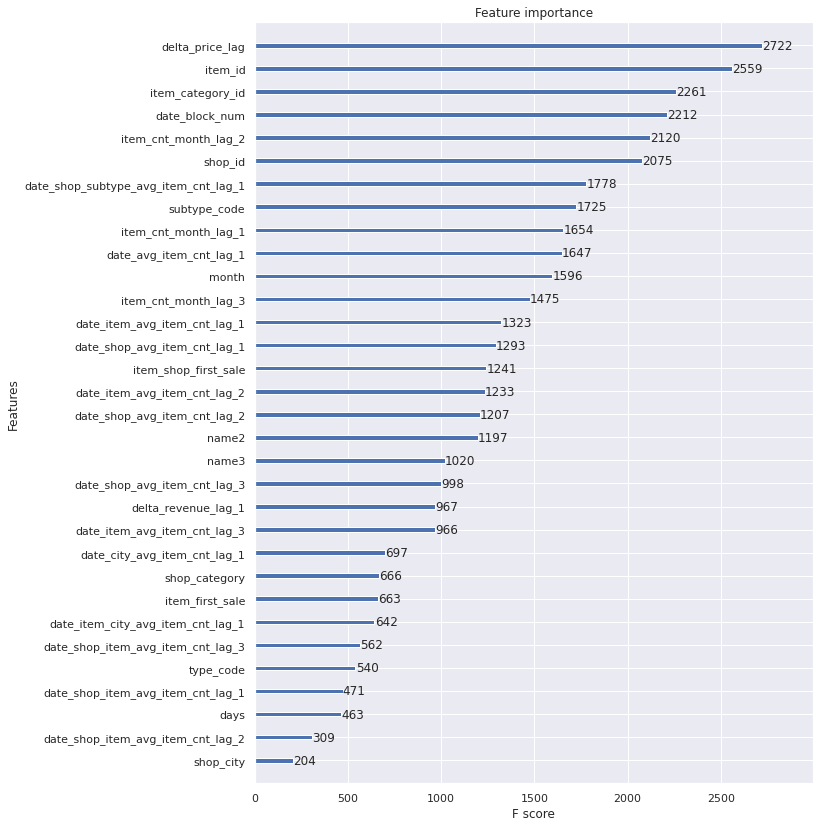

In [100]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))